### Trip Volume Analysis
## How has the volume of Bixi trips changed over time?

using open data from bixi's website from 2014 to 2024

In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy.stats as ss
from meteostat import Point, Monthly
from datetime import datetime

from sklearn.linear_model import LinearRegression


## Part 1 : Cleaning data

In [41]:
data_folder = 'raw_data/'
files = os.listdir(data_folder)
csv_files = [f for f in files]
csv_files

['.DS_Store',
 'BixiMontrealRentals2016',
 'BixiMontrealRentals2018',
 'BixiMontrealRentals2020',
 'BixiMontrealRentals2021',
 'BixiMontrealRentals2019',
 'BixiMontrealRentals2017',
 'BixiMontrealRentals2015',
 'BixiMontrealRentals2023',
 'BixiMontrealRentals2024',
 'BixiMontrealRentals2022',
 'BixiMontrealRentals2014']

### Cleaning 2014 - 2019

In [42]:
def cleanMonthlyDataFor(year):
    # Path to the folder containing year data files
    data_folder = f'raw_data/BixiMontrealRentals{year}/'

    # List of files to be processed
    files = [f for f in os.listdir(data_folder) if f.startswith(f'OD_{year}') and f.endswith('.csv')]

    # List to store month and row count (volume)
    data = []

    # Loop through each file, read it, and count the rows
    for file in files:
        # Extract the month from the filename (e.g., 'OD_{year}-04.csv' -> 04)
        month = file.split('-')[1].split('.')[0]
        
        # Read the file into a DataFrame
        file_path = os.path.join(data_folder, file)
        df = pd.read_csv(file_path)
        
        # Count the number of rows (excluding the header)
        volume = len(df)
        
        # Store the month and volume in the data list
        data.append({'month': int(month), 'volume': volume})

    # Create a DataFrame from the collected data
    result_df = pd.DataFrame(data)

    # Sort the DataFrame by month to ensure the order is correct
    result_df = result_df.sort_values(by='month')

    # Define the output path for the cleaned file
    output_path = f'question1_data/{year}_cleaned.csv'

    # Save the cleaned data to a new CSV file
    result_df.to_csv(output_path, index=False)

    print(f"Cleaned data written to {output_path}")


In [43]:
for year in range(2014,2020):
    cleanMonthlyDataFor(year)

Cleaned data written to question1_data/2014_cleaned.csv
Cleaned data written to question1_data/2015_cleaned.csv
Cleaned data written to question1_data/2016_cleaned.csv
Cleaned data written to question1_data/2017_cleaned.csv
Cleaned data written to question1_data/2018_cleaned.csv


Cleaned data written to question1_data/2019_cleaned.csv


### Cleaning 2020 - 2021

In [44]:
def cleanYearlyDataFor(year):
    # Path to the {year} data file
    data_file = f'raw_data/BixiMontrealRentals{year}/OD_{year}.csv'

    # Read the CSV file into a DataFrame
    df = pd.read_csv(data_file)

    # Convert the 'start_date' column to datetime format
    df['start_date'] = pd.to_datetime(df['start_date'])

    # Extract the month from the 'start_date' column
    df['month'] = df['start_date'].dt.month

    # Group by month and count the number of rows (volume) for each month
    monthly_volume = df.groupby('month').size().reset_index(name='volume')

    # Define the output path for the cleaned file
    output_path = f'question1_data/{year}_cleaned.csv'

    # Save the cleaned data to a new CSV file
    monthly_volume.to_csv(output_path, index=False)

    print(f"Cleaned data written to {output_path}")



In [45]:
for year in range(2020,2022):
    cleanYearlyDataFor(year)

Cleaned data written to question1_data/2020_cleaned.csv
Cleaned data written to question1_data/2021_cleaned.csv


### Cleaning 2022 - 2024

In [46]:
def cleanYearlyLinuxTStmpDataFor(year):
    # Path to the {year} data file
    data_file = f'raw_data/BixiMontrealRentals{year}/OD_{year}.csv'

    # Read the CSV file into a DataFrame
    df = pd.read_csv(data_file)
        
    # Convert 'STARTTIMEMS' (Linux timestamp in milliseconds) to datetime
    df['start_time'] = pd.to_datetime(df['STARTTIMEMS'], unit='ms')

    # Extract the month from the 'start_time' column
    df['month'] = df['start_time'].dt.month

    # Group by month and count the number of rows (volume) for each month
    monthly_volume = df.groupby('month').size().reset_index(name='volume')

    # Define the output path for the cleaned file
    output_path = f'question1_data/{year}_cleaned.csv'

    # Save the cleaned data to a new CSV file
    monthly_volume.to_csv(output_path, index=False)

    print(f"Cleaned data written to {output_path}")


In [47]:
for year in range(2022,2025):
    cleanYearlyLinuxTStmpDataFor(year)

Cleaned data written to question1_data/2022_cleaned.csv
Cleaned data written to question1_data/2023_cleaned.csv
Cleaned data written to question1_data/2024_cleaned.csv


## Part 2 : Analyse and Visualize data

### Plot individually

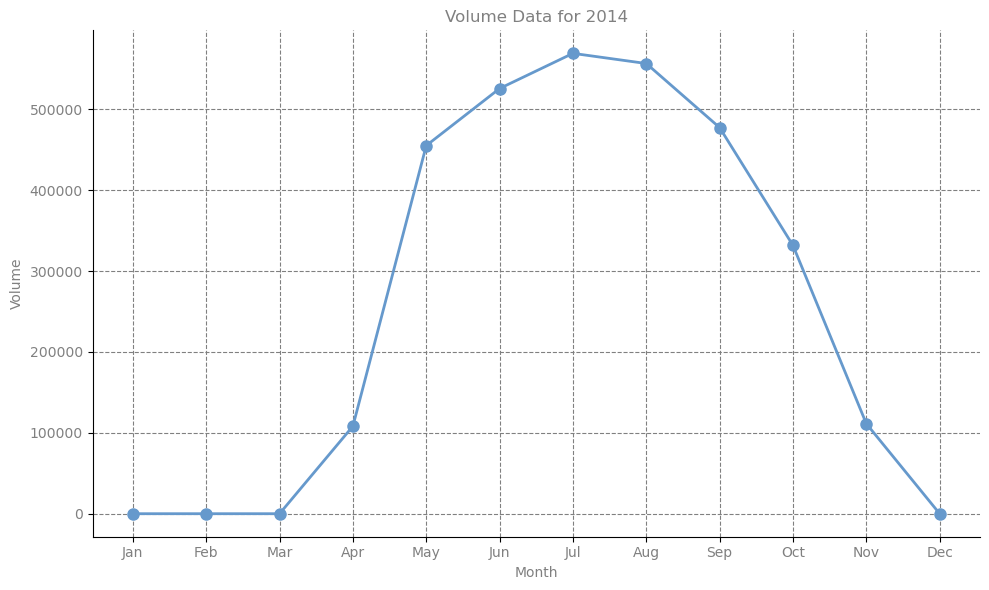

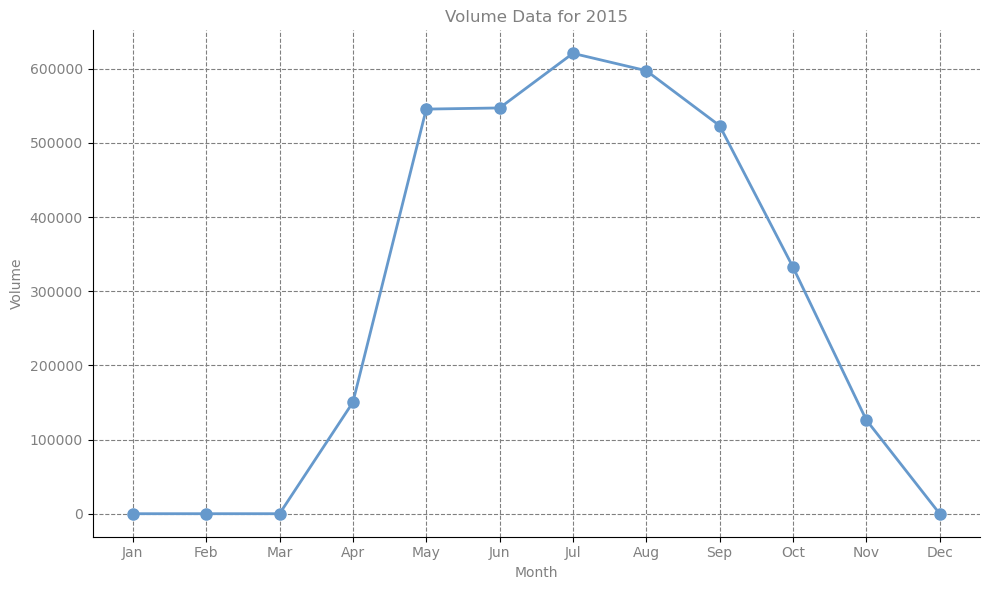

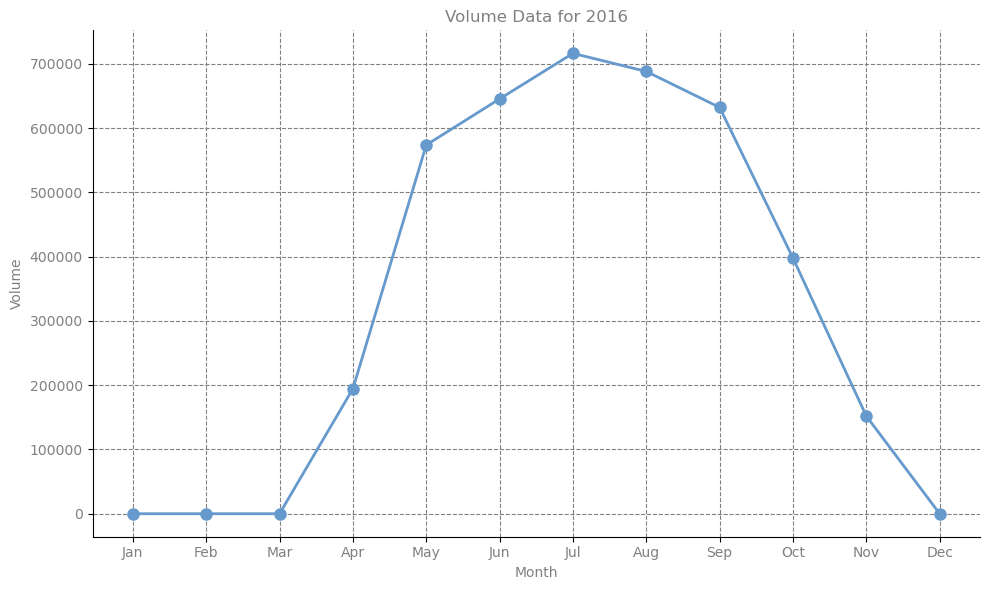

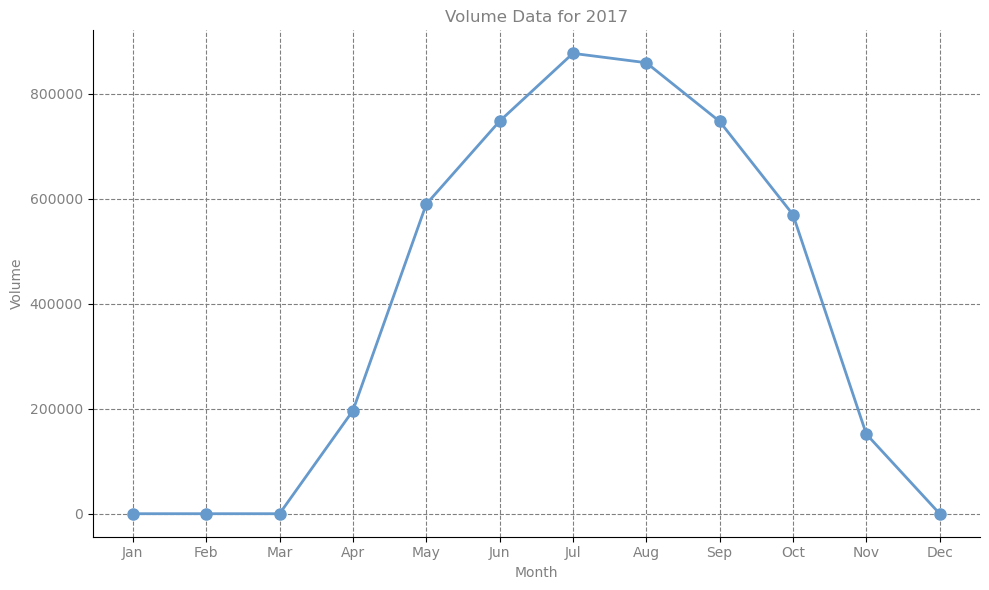

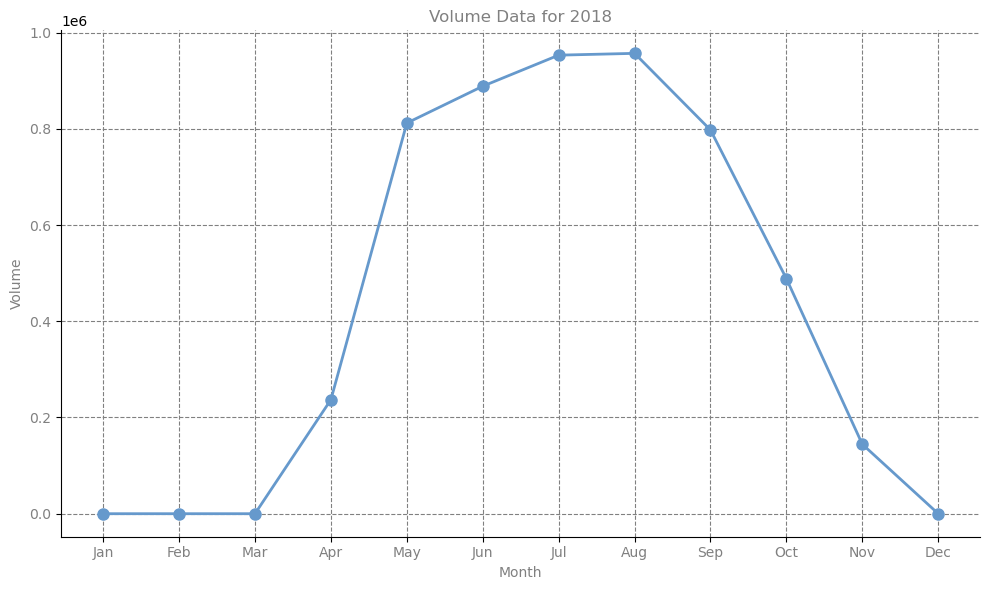

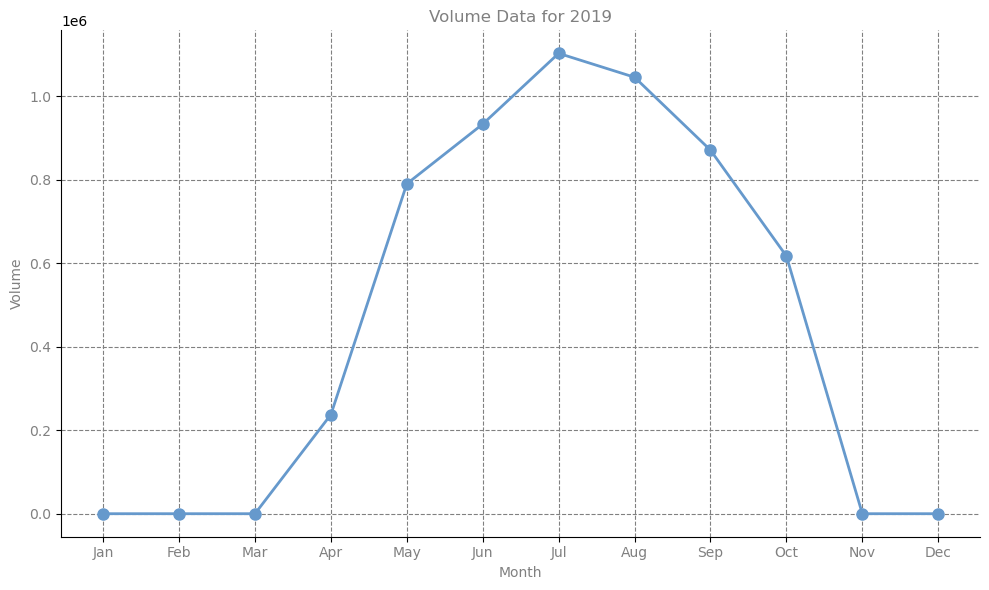

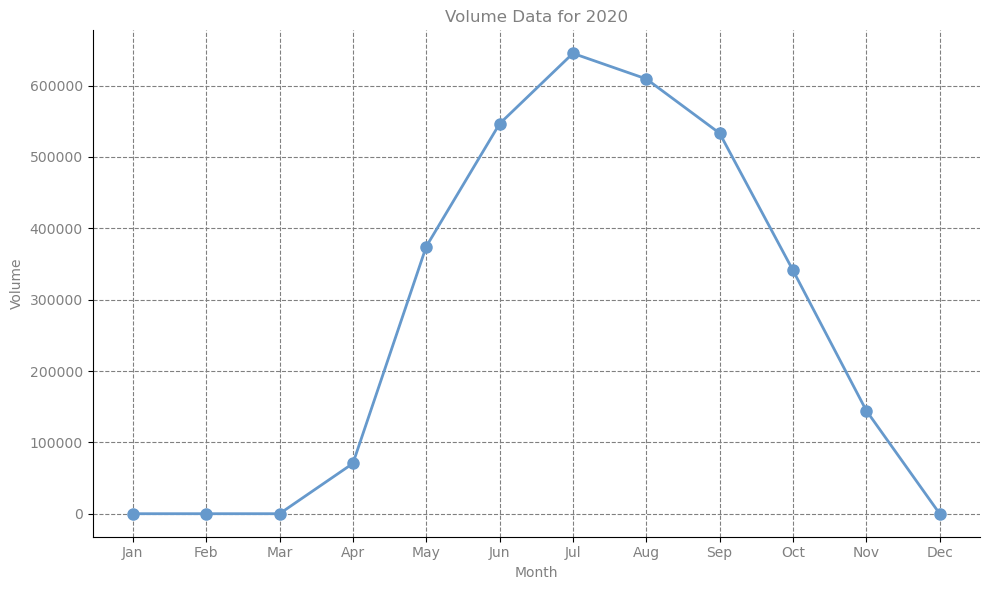

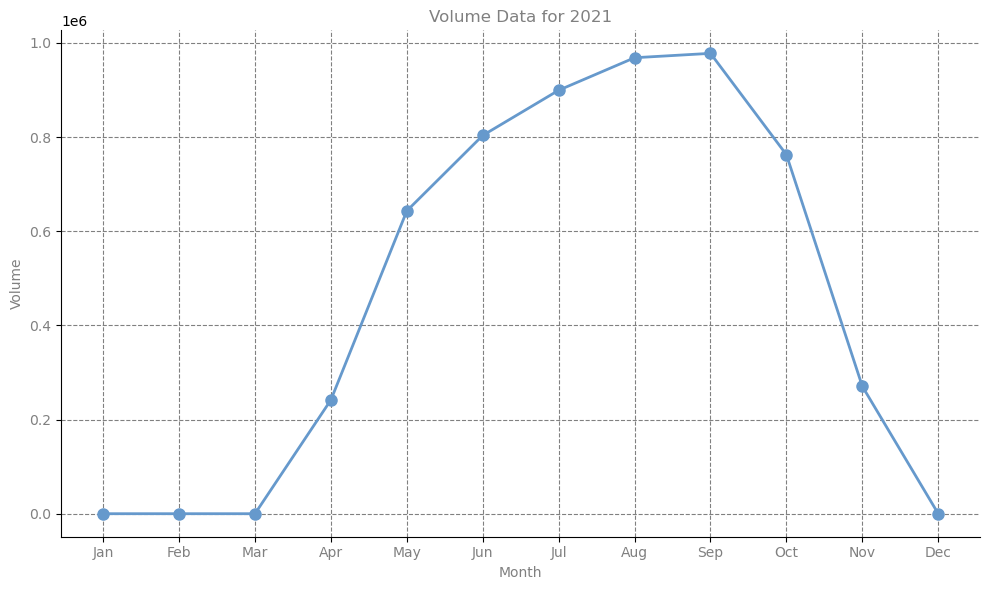

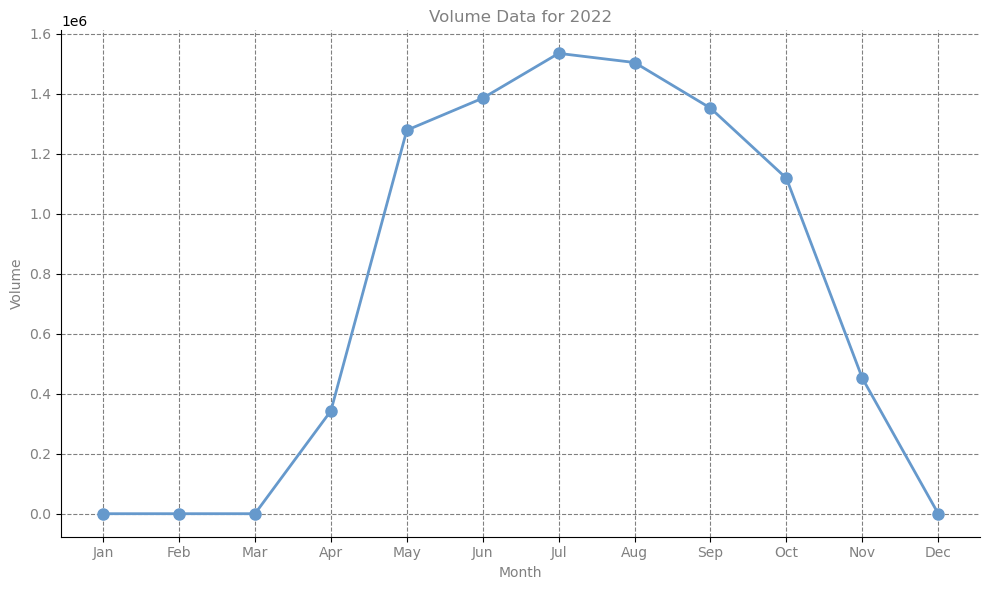

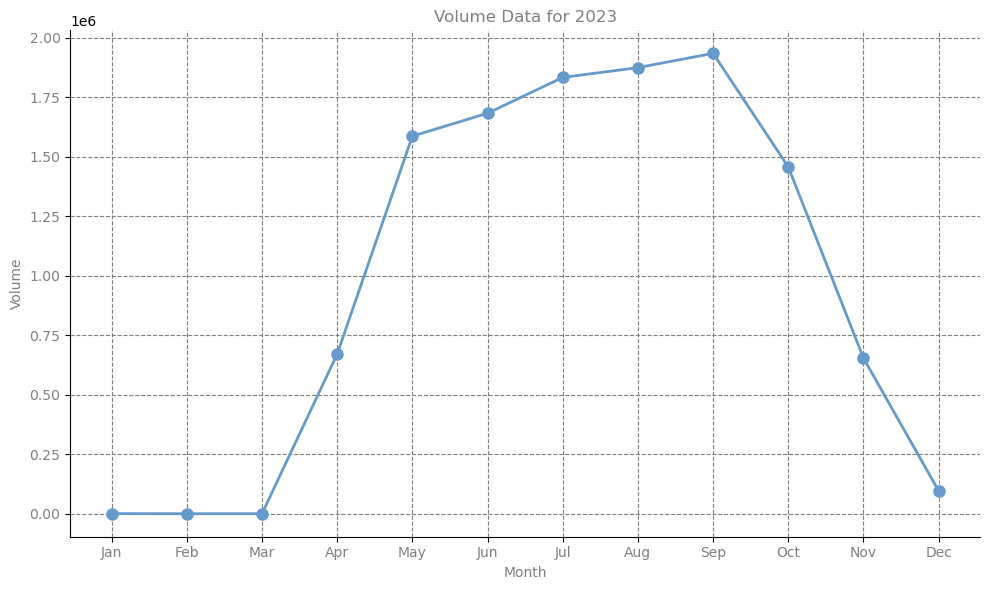

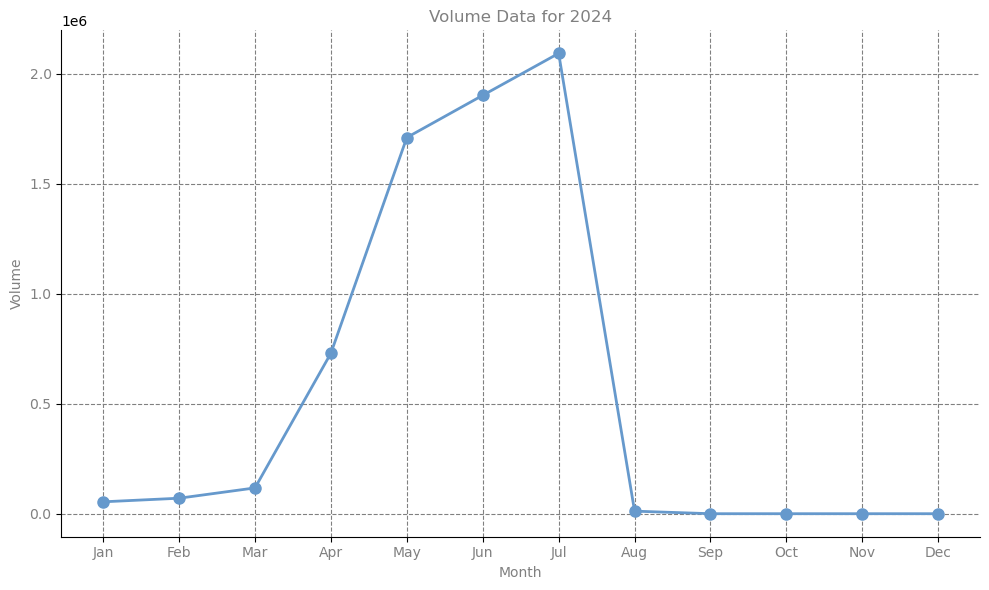

In [48]:
# Define the directory containing the files
directory = "question1_data/"

# List to hold DataFrames
dfs = []

# Read all CSV files from the directory
for file_name in os.listdir(directory):
    if file_name.endswith('.csv'):
        file_path = os.path.join(directory, file_name)
        # Extract year from the file name
        year = file_name.split('_')[0]
        # Read CSV file
        df = pd.read_csv(file_path)
        # Rename columns
        df.rename(columns={'Month': 'month', 'Volume': 'volume'}, inplace=True)
        df['Year'] = year  # Add a column for the year
        dfs.append(df)

# Concatenate all DataFrames into one
data = pd.concat(dfs, ignore_index=True)

# Convert month column to string
data['month'] = data['month'].apply(lambda x: pd.Timestamp(f'{int(x)}/1/2020').strftime('%b'))

# Define color and style
line_color = "#6699CC"
axis_color = "grey"

def plotYearlyDataFor(year):
    """Plot the volume data for a specific year."""
    # Create a DataFrame for the year with all months
    all_months = pd.DataFrame({'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']})
    all_months['Year'] = year
    
    # Merge with the actual data for the year
    df_year = pd.merge(all_months, data[data['Year'] == year], on=['month', 'Year'], how='left')
    
    # Fill missing values with 0 (or NaN if preferred)
    df_year['volume'] = df_year['volume'].fillna(0)
    
    # Ensure months are sorted
    df_year['month'] = pd.Categorical(df_year['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                                      ordered=True)
    df_year = df_year.sort_values('month')
    
    # Create a plot
    plt.figure(figsize=(10, 6))
    
    # Plot line and markers
    plt.plot(df_year['month'], df_year['volume'], color=line_color, marker='o', linestyle='-', linewidth=2, markersize=8)
    
    # Customize axis
    plt.xlabel('Month', color=axis_color)
    plt.ylabel('Volume', color=axis_color)
    plt.xticks(color=axis_color, rotation=0)  # Set x-axis text to horizontal
    plt.yticks(color=axis_color)
    plt.grid(True, linestyle='--', color=axis_color)
    
    # Remove chart borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Title and show plot
    plt.title(f'Volume Data for {year}', color=axis_color)
    plt.tight_layout()
    plt.show()

# Plot data for each year in order
years = sorted(data['Year'].unique())
for year in years:
    plotYearlyDataFor(year)


### Comparison

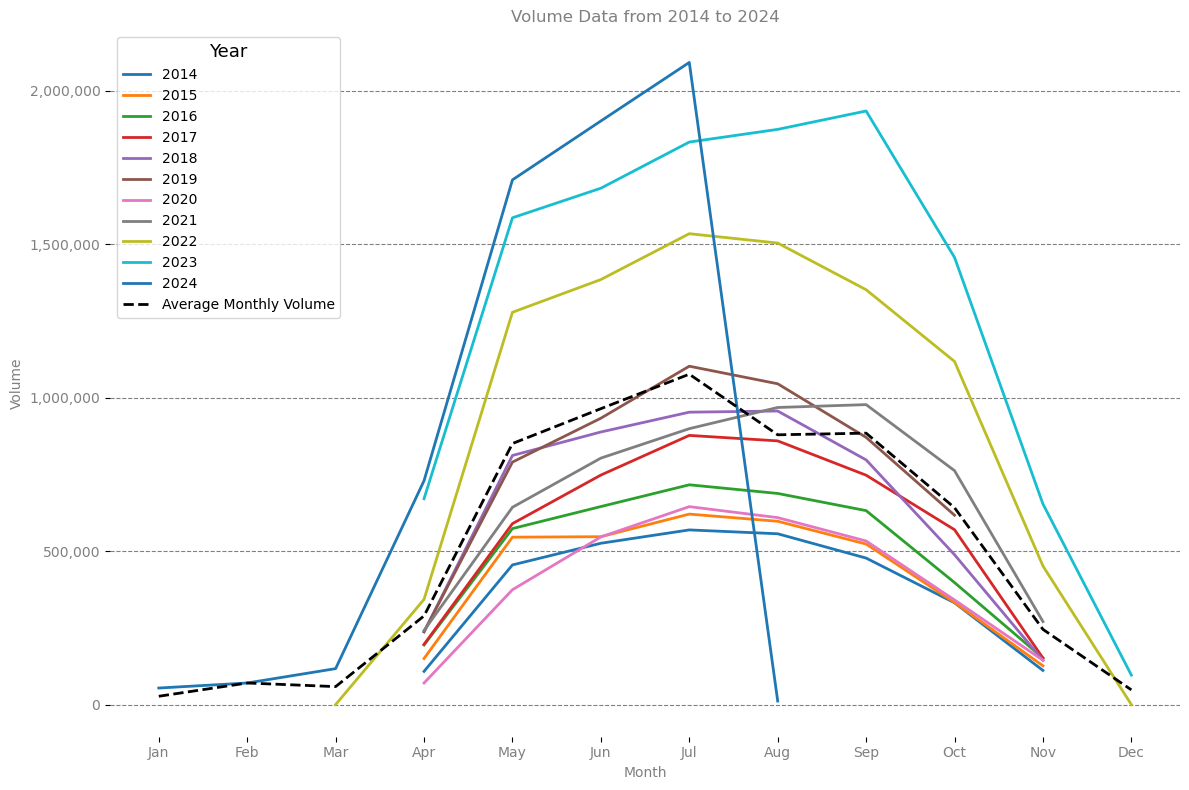

In [49]:
# Define the directory containing the files
directory = "question1_data/"

# List to hold DataFrames
dfs = []

# Read all CSV files from the directory
for file_name in os.listdir(directory):
    if file_name.endswith('.csv'):
        file_path = os.path.join(directory, file_name)
        # Extract year from the file name
        year = file_name.split('_')[0]
        # Read CSV file
        df = pd.read_csv(file_path)
        # Rename columns
        df.rename(columns={'Month': 'month', 'Volume': 'volume'}, inplace=True)
        df['Year'] = year  # Add a column for the year
        dfs.append(df)

# Concatenate all DataFrames into one
data = pd.concat(dfs, ignore_index=True)

# Define the correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert month column to string
data['month'] = data['month'].apply(lambda x: pd.Timestamp(f'{int(x)}/1/2020').strftime('%b'))

# Define a color palette for different years
colors = sns.color_palette("tab10", n_colors=len(data['Year'].unique()))

def plotAllYears():
    """Plot volume data for all years in one plot with different colors for each year."""
    plt.figure(figsize=(12, 8))
    
    # Define a list of years to plot
    years_to_plot = sorted(data['Year'].unique())
    
    # Create a color map for years
    color_map = {year: colors[i] for i, year in enumerate(years_to_plot)}
    
    # Calculate the average volume per month
    avg_volume = data.groupby('month')['volume'].mean().reindex(month_order)
    
    for year in years_to_plot:
        # Create a DataFrame for the year with all months
        all_months = pd.DataFrame({'month': month_order})
        all_months['Year'] = year
        
        # Merge with the actual data for the year
        df_year = pd.merge(all_months, data[data['Year'] == year], on=['month', 'Year'], how='left')
        
        # Fill missing values with NaN to facilitate filtering
        df_year['volume'] = df_year['volume'].fillna(np.nan)
        
        # Ensure months are sorted
        df_year['month'] = pd.Categorical(df_year['month'], categories=month_order, ordered=True)
        df_year = df_year.sort_values('month')
        
        # Special handling for 2024
        if year == '2024':
            df_year = df_year[df_year['month'].isin(month_order[:9])]  # Only up to September
        
        # Plot line with different color for each year
        plt.plot(df_year['month'], df_year['volume'], color=color_map[year], linestyle='-', linewidth=2, label=year)
        
        # Add year label with same color
        #last_month_index = df_year.index[-1]
        #plt.text(df_year['month'].iloc[-1], df_year['volume'].iloc[-1], year, 
                 #color=color_map[year], fontsize=10, ha='left', va='center')
    
    # Plot the average volume line
    plt.plot(month_order, avg_volume, color='black', linestyle='--', linewidth=2, label='Average Monthly Volume')
    
    # Customize axis
    plt.xlabel('Month', color='grey')
    plt.ylabel('Volume', color='grey')
    plt.xticks(ticks=month_order, labels=month_order, color='grey', rotation=0)  # Full month names
    plt.yticks(color='grey')
    
    # Add only horizontal grid lines
    plt.grid(axis='y', linestyle='--', color='grey')
    
    # Remove chart borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    
    # Format y-axis to use full number representation
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    
    # Title and show legend
    plt.title('Volume Data from 2014 to 2024', color='grey')
    plt.legend(title='Year', title_fontsize='13', fontsize='10', loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot data for all years
plotAllYears()


### Total trips volume per year

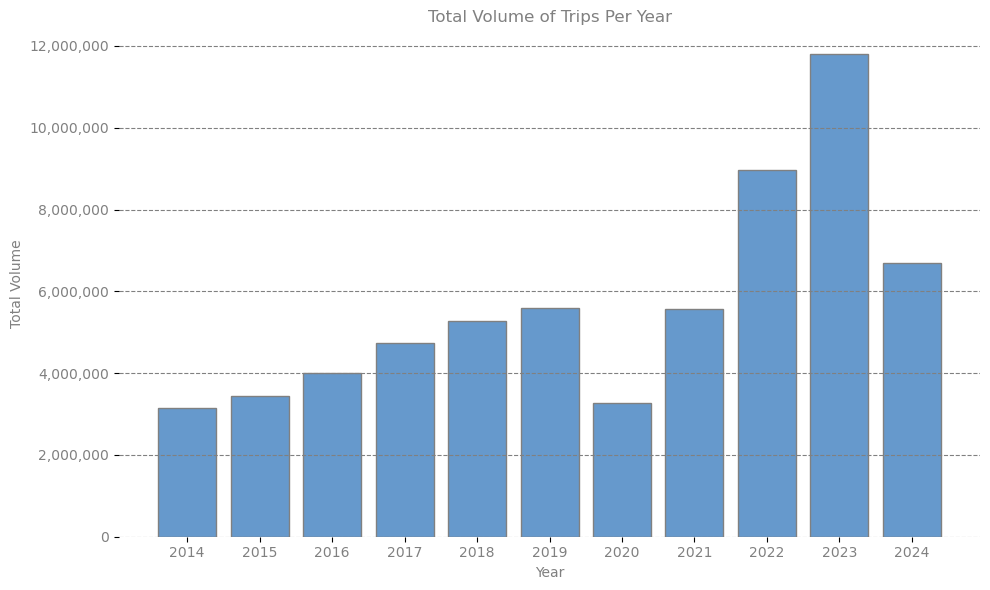

In [50]:
# Define the directory containing the files
directory = "question1_data/"

# List to hold DataFrames
dfs = []

# Read all CSV files from the directory
for file_name in os.listdir(directory):
    if file_name.endswith('.csv'):
        file_path = os.path.join(directory, file_name)
        # Extract year from the file name
        year = file_name.split('_')[0]
        # Read CSV file
        df = pd.read_csv(file_path)
        # Rename columns
        df.rename(columns={'Month': 'month', 'Volume': 'volume'}, inplace=True)
        df['Year'] = year  # Add a column for the year
        dfs.append(df)

# Concatenate all DataFrames into one
data = pd.concat(dfs, ignore_index=True)

# Aggregate total volume per year
total_volume_per_year = data.groupby('Year')['volume'].sum().sort_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot total volume per year
plt.bar(total_volume_per_year.index, total_volume_per_year.values, color='#6699CC', edgecolor='grey')

# Customize axis
plt.xlabel('Year', color='grey')
plt.ylabel('Total Volume', color='grey')
plt.xticks(color='grey')
plt.yticks(color='grey')

# Add grid lines for y-axis
plt.grid(axis='y', linestyle='--', color='grey')

# Remove chart borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Format y-axis to use full number representation
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Title
plt.title('Total Volume of Trips Per Year', color='grey')

plt.tight_layout()
plt.show()


## (*) Weather monthly average comparison in montreal from 2014 to 2024

### Retrieving Information

In [51]:
# Montreal coordinates
montreal = Point(45.5017, -73.5673)

# Time period (2014 to 2024)
start = datetime(2014, 1, 1)
end = datetime(2024, 12, 31)

# Fetch the monthly weather data from meteostat
data = Monthly(montreal, start, end).fetch()

# Ensure the index is parsed correctly into datetime
data.index = pd.to_datetime(data.index, format='%Y-%m-%d', errors='coerce')

# Extract year and month
data['year'] = data.index.year
data['month'] = data.index.month

# Select relevant columns (e.g., average temperature, precipitation)
monthly_data = data[['tavg', 'prcp']]

# Reset index
monthly_data = monthly_data.reset_index(drop=True)

# Preview the data
print(monthly_data.head())

   tavg   prcp
0  -9.4   53.6
1  -7.9   35.0
2  -6.4   67.0
3   6.1  141.3
4  13.9  108.4


 ### Cleaning Information and Parsing

In [52]:
# Convert the index (date) to a datetime object and extract year and month
data.index = pd.to_datetime(data.index)
data['year'] = data.index.year
data['month'] = data.index.month

# Calculate monthly averages (mean temperature and precipitation, etc.)
monthly_data = data.groupby(['year', 'month']).mean()

# Select relevant columns (e.g., temperature, precipitation)
monthly_data = monthly_data[['tavg', 'prcp']]  # tavg = average temperature, prcp = precipitation

# Reset index for easier manipulation
monthly_data = monthly_data.reset_index()

# Preview the cleaned monthly data
print(monthly_data.head())

   year  month  tavg   prcp
0  2014      1  -9.4   53.6
1  2014      2  -7.9   35.0
2  2014      3  -6.4   67.0
3  2014      4   6.1  141.3
4  2014      5  13.9  108.4


### Saving Weather Information for Each Year

In [53]:
# Create a folder to store the CSV files
if not os.path.exists("montreal_weather"):
    os.makedirs("montreal_weather")

# Loop through each year and save the data
for year in monthly_data['year'].unique():
    yearly_data = monthly_data[monthly_data['year'] == year]
    yearly_data.to_csv(f"montreal_weather/montreal_weather_{year}.csv", index=False)

print("Weather data saved successfully for each year.")


Weather data saved successfully for each year.


### Read exported files

In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing weather data files
data_dir = "montreal_weather"

# Read all CSV files for each year into a dictionary
weather_data = {}
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        year = filename.split('_')[-1].split('.')[0]  # Extract the year from the filename
        file_path = os.path.join(data_dir, filename)
        weather_data[year] = pd.read_csv(file_path)

# Check if data is loaded properly
print(weather_data.keys())  # Print the years loaded

dict_keys(['2017', '2016', '2014', '2015', '2018', '2024', '2019', '2022', '2023', '2021', '2020'])


### Plot each year individually

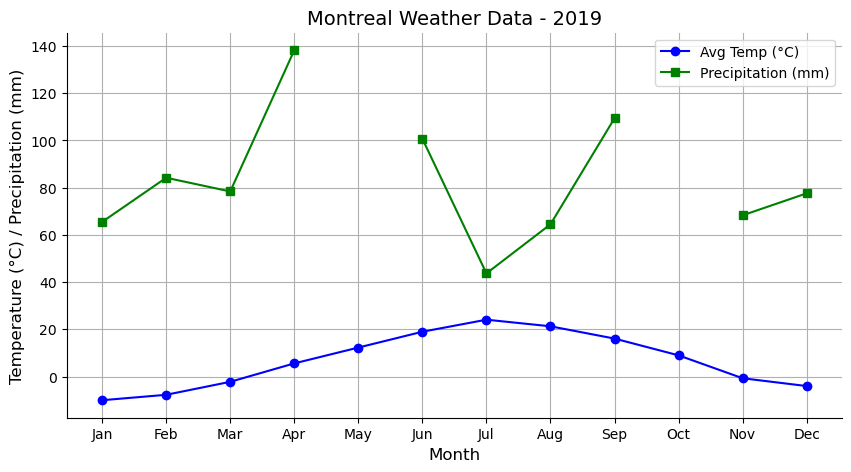

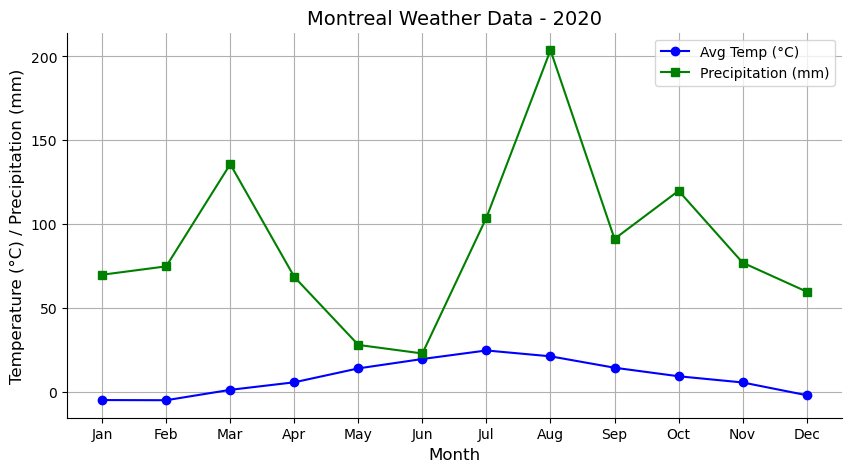

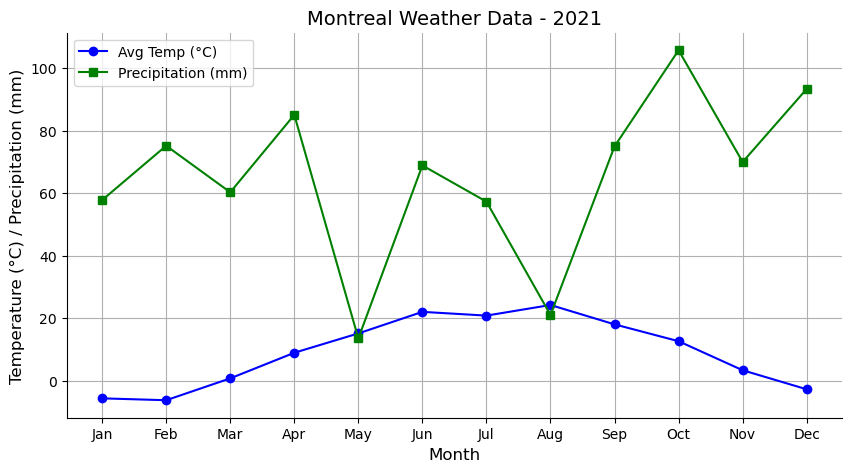

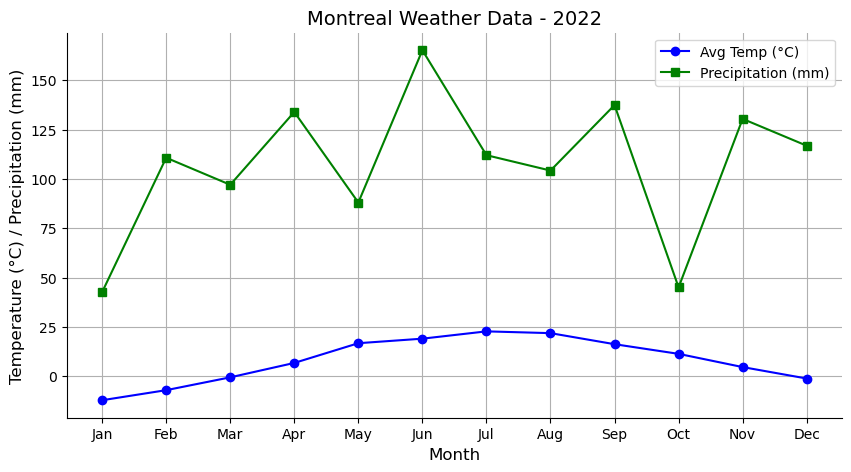

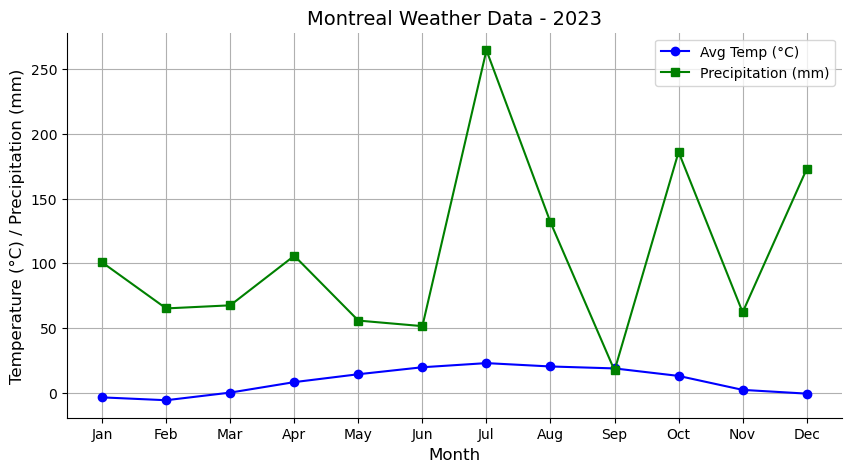

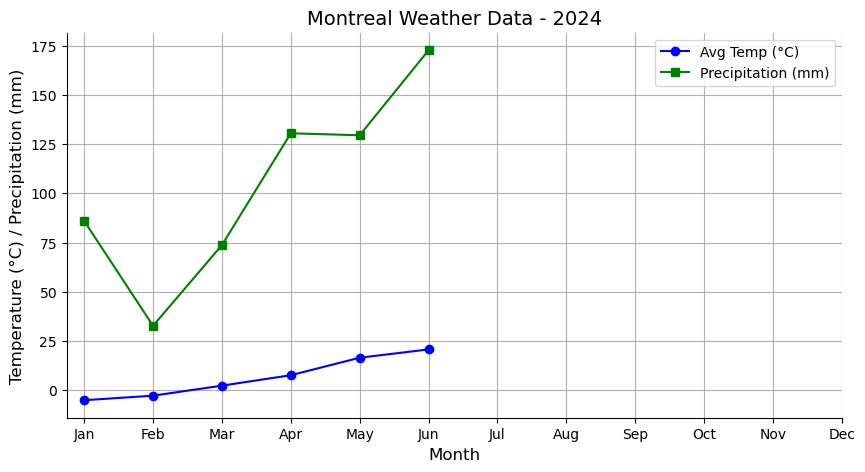

In [55]:

# Plot each year individually
for year in sorted(weather_data.keys()):
    # filter the plot to range 2019 to 2014
    if int(year) not in range(2019,2025):
        continue
    data = weather_data[year]
    
    # Create a new figure for each year
    plt.figure(figsize=(10, 5))
    
    # Plot temperature
    plt.plot(data['month'], data['tavg'], marker='o', color='b', label="Avg Temp (°C)")
    
    # Plot precipitation
    plt.plot(data['month'], data['prcp'], marker='s', color='g', label="Precipitation (mm)")
    
    # Set title and labels
    plt.title(f"Montreal Weather Data - {year}", fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Temperature (°C) / Precipitation (mm)', fontsize=12)
    
    # Customize x-axis with month names and set them horizontal
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
    
    # Remove chart borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add legend and grid
    plt.legend(loc='best')
    plt.grid(True)
    
    # Show the plot
    plt.show()


### Plot all in same figure

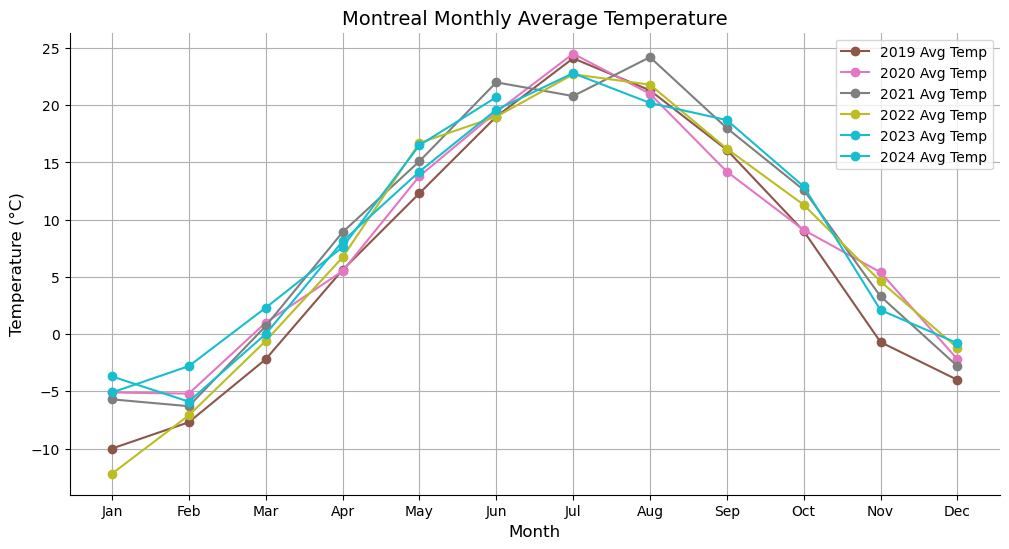

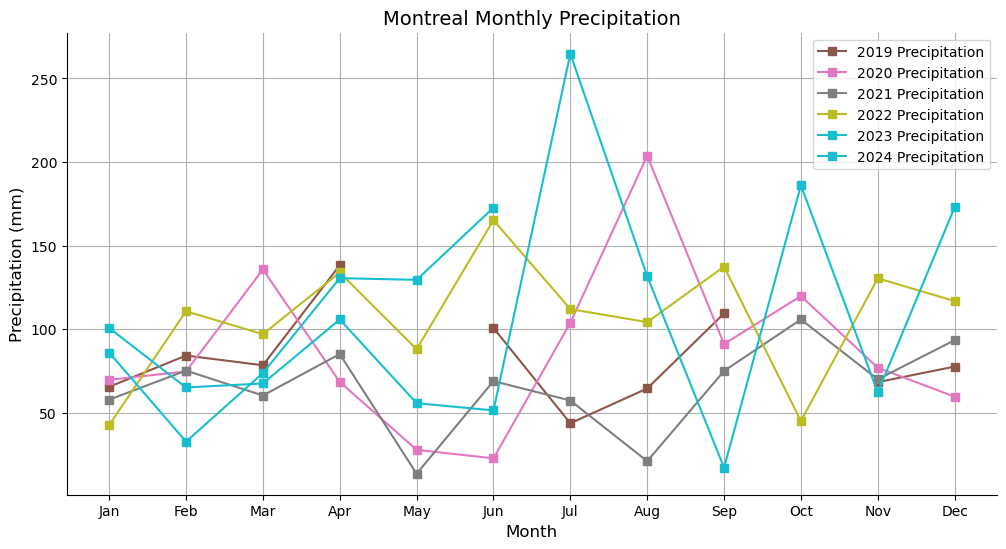

In [56]:

# Plot all years' temperature in one figure
plt.figure(figsize=(12, 6))

# Use different colors for each year
colors = cm.get_cmap('tab10', len(weather_data))  # Use colormap
for idx, year in enumerate(sorted(weather_data.keys())):
    # filter the plot to range 2019 to 2014
    if int(year) not in range(2019,2025):
        continue
    data = weather_data[year]
    plt.plot(data['month'], data['tavg'], marker='o', color=colors(idx), label=f"{year} Avg Temp")

# Set title and labels
plt.title("Montreal Monthly Average Temperature", fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Customize x-axis with month names and set them horizontal
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

# Remove chart borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend and grid
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

# Plot all years' precipitation in a different figure
plt.figure(figsize=(12, 6))

# Use different colors for each year
for idx, year in enumerate(sorted(weather_data.keys())):
    # filter the plot to range 2019 to 2014
    if int(year) not in range(2019,2025):
        continue
    data = weather_data[year]
    plt.plot(data['month'], data['prcp'], marker='s', color=colors(idx), label=f"{year} Precipitation")

# Set title and labels
plt.title("Montreal Monthly Precipitation", fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)

# Customize x-axis with month names and set them horizontal
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

# Remove chart borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend and grid
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()


## Predict number of trips volume for 2024

12436583.997042656


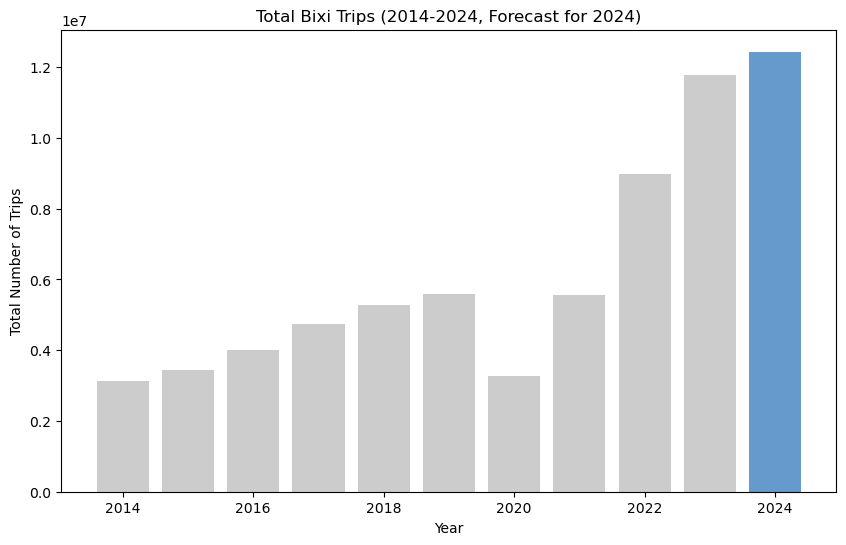

In [57]:
from sklearn.linear_model import LinearRegression

# Load and prepare the data
data_dir = 'question1_data/'  # Replace with the actual directory if different
years = list(range(2014, 2025))

# Create an empty DataFrame to store all data
all_data = []

# Load data for 2019 to 2023
for year in range(2014, 2024):
    file_path = f'{data_dir}{year}_cleaned.csv'
    yearly_data = pd.read_csv(file_path)
    yearly_data['Year'] = year
    all_data.append(yearly_data)

# Concatenate all years into one DataFrame
data = pd.concat(all_data)

# Calculate total trips for each year from 2019 to 2023
total_trips_by_year = data.groupby('Year')['volume'].sum()

# Prepare data for the forecast (2019 to 2023)
X = data[data['Year'] < 2024][['Year', 'month']]
y = data[data['Year'] < 2024]['volume']

# Fit a regression model to predict future trips for 2024
model = LinearRegression()
model.fit(X, y)

# Create data for forecast
months_2024 = np.arange(1, 13)
X_future = np.array([[2024, month] for month in months_2024])
forecast_2024 = model.predict(X_future)

# Add the forecasted total for 2024
total_forecast_2024 = forecast_2024.sum()
print(total_forecast_2024)

# Combine the total trips for 2019-2023 and the forecast for 2024
years = list(range(2014, 2025))
total_trips = list(total_trips_by_year) + [total_forecast_2024]

# Plot total trips (2019-2023) and forecasted trips for 2024 as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, total_trips, color=['#CCCCCC'] * 10 + ['#6699CC'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Number of Trips')
plt.title('Total Bixi Trips (2014-2024, Forecast for 2024)')

# Show bar chart
plt.show()
